In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

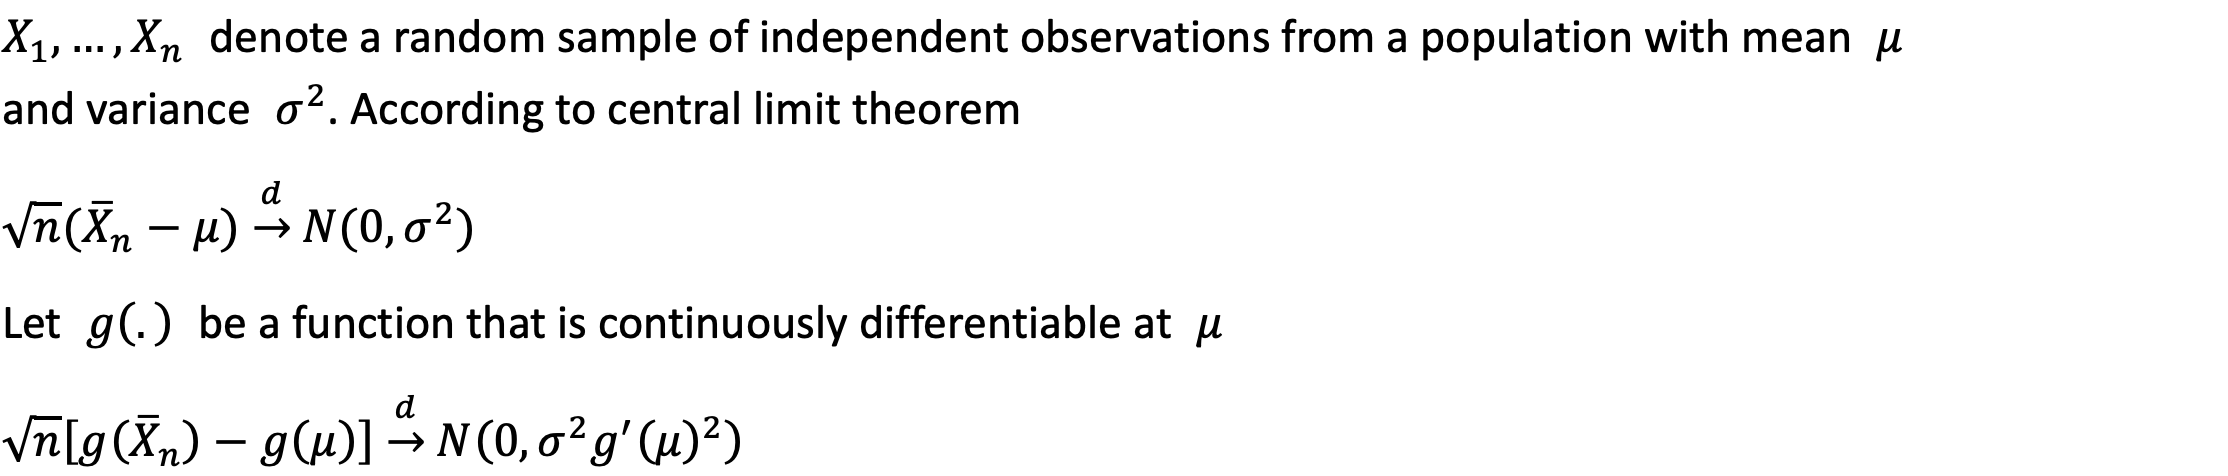

In [ ]:
n_experiment = 1000
sample_size  = 1000

## 1. Delta Method with Normal Distribution - N(mu,sigma2)

In [11]:
mu     = 10
sigma2 = 5

In [108]:
population = np.random.normal(mu,np.sqrt(sigma2),100000)

In [109]:
sample_mean = [np.nan]*n_experiment
for i in range(n_experiment):
    sample_now = np.random.choice(population, size=sample_size,replace=True)
    sample_mean[i] = np.mean(sample_now)

In [110]:
Theoretical_mean = mu
series_1 = [np.sqrt(sample_size)*(sample_mean[i]-Theoretical_mean) for i in range(n_experiment)]
series_2 = [np.sqrt(sample_size)*(2*sample_mean[i]-2*Theoretical_mean) for i in range(n_experiment)]
series_3 = [np.sqrt(sample_size)*(1/sample_mean[i]-1/Theoretical_mean) for i in range(n_experiment)]
series_4 = [np.sqrt(sample_size)*(sample_mean[i]**2-Theoretical_mean**2) for i in range(n_experiment)]

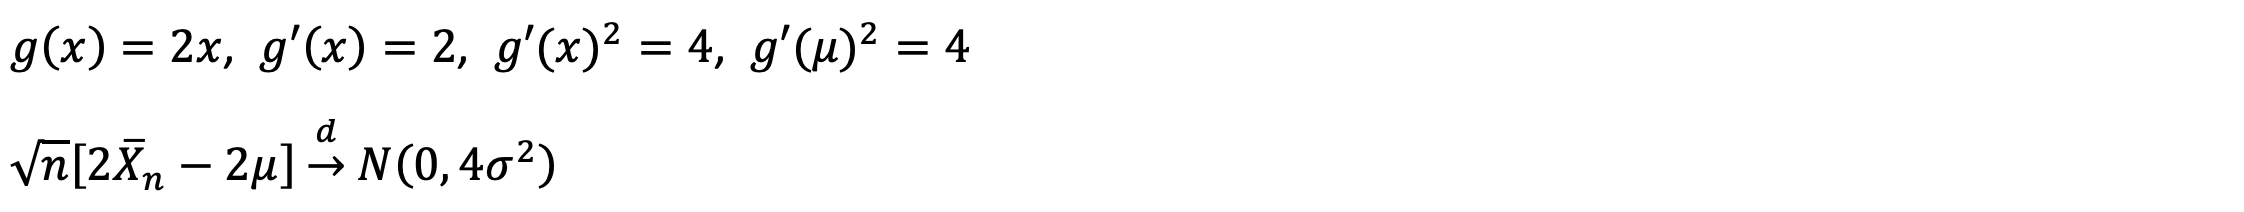

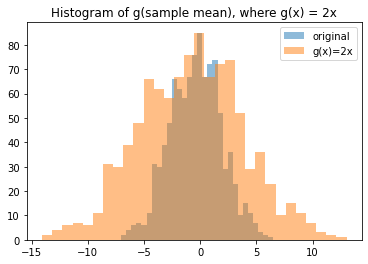

Theoretical Variance: 20
Sample Variance: 21.048


In [111]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_2,alpha=0.5,bins=30,label = 'g(x)=2x')
plt.title('Histogram of g(sample mean), where g(x) = 2x')
plt.legend()
plt.show()
print("Theoretical Variance: " + str(4*sigma2))
print("Sample Variance: " + str(round(np.var(series_2,ddof=1),3)))

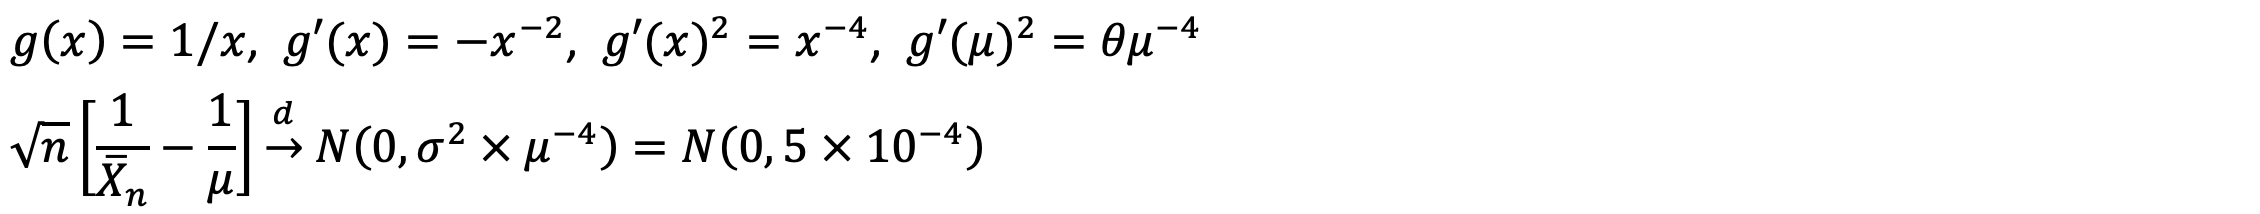

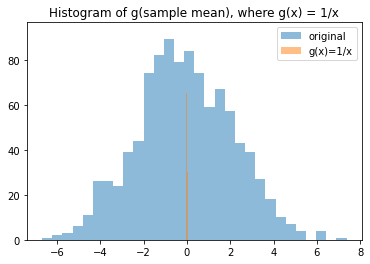

Analytical Variance: 0.0005
Sample Variance: 0.00048


In [91]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_3,alpha=0.5,bins=30,label = 'g(x)=1/x')
plt.title('Histogram of g(sample mean), where g(x) = 1/x')
plt.legend()
plt.show()
print("Theoretical Variance: " + str(sigma2*mu**(-4)))
print("Sample Variance: " + str(round(np.var(series_3,ddof=1),5)))

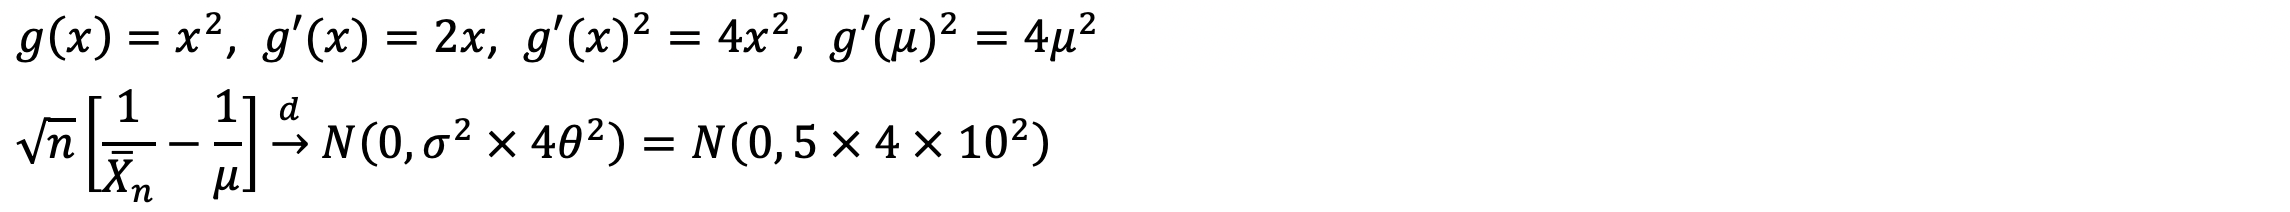

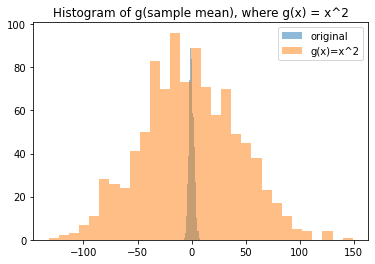

Analytical Variance: 2000
Sample Variance: 1934.26682


In [94]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_4,alpha=0.5,bins=30,label = 'g(x)=x^2')
plt.title('Histogram of g(sample mean), where g(x) = x^2')
plt.legend()
plt.show()
print("Theoretical Variance: " + str(sigma2*4*mu**(2)))
print("Sample Variance: " + str(round(np.var(series_4,ddof=1),5)))

## 2. Delta Method with Exponential Distribution - Exp(Lambda)

In [127]:
Lambda = 5

In [128]:
##### In np.random.exponential, to create a sample of Exp(Lambda), using scale = 1/Lambda
population = np.random.exponential(scale = 1/Lambda,size= 100000)

In [119]:
sample_mean = [np.nan]*n_experiment
for i in range(n_experiment):
    sample_now = np.random.choice(population, size=sample_size,replace=True)
    sample_mean[i] = np.mean(sample_now)

In [120]:
Theoretical_mean = 1/Lambda
series_1 = [np.sqrt(sample_size)*(sample_mean[i]-Theoretical_mean) for i in range(n_experiment)]
series_2 = [np.sqrt(sample_size)*(2*sample_mean[i]-2*Theoretical_mean) for i in range(n_experiment)]
series_3 = [np.sqrt(sample_size)*(1/sample_mean[i]-1/Theoretical_mean) for i in range(n_experiment)]
series_4 = [np.sqrt(sample_size)*(sample_mean[i]**2-Theoretical_mean**2) for i in range(n_experiment)]

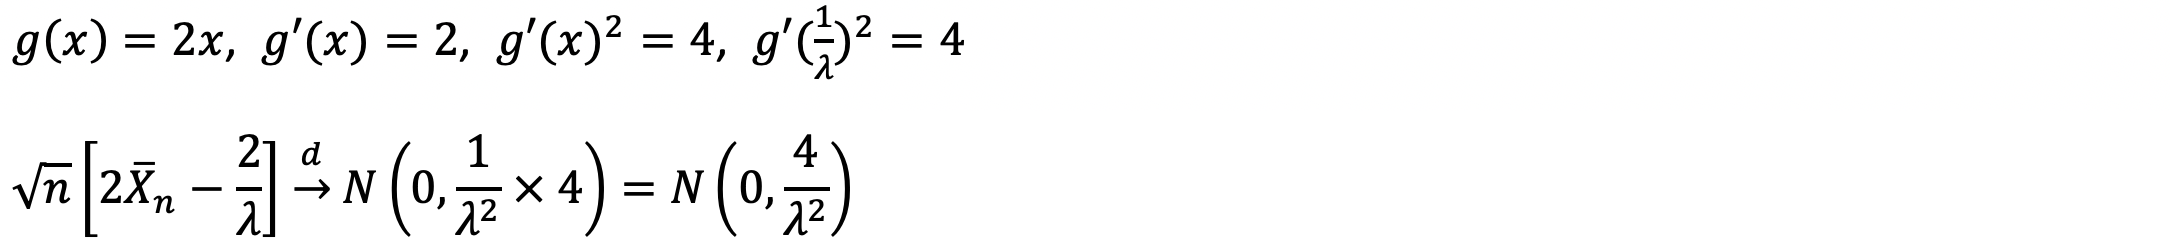

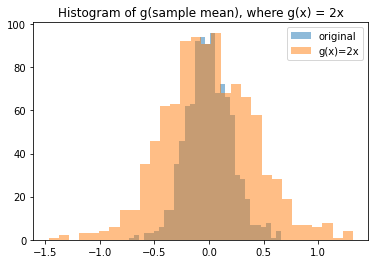

Theoretical Variance: 0.16
Sample Variance: 0.168


In [134]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_2,alpha=0.5,bins=30,label = 'g(x)=2x')
plt.title('Histogram of g(sample mean), where g(x) = 2x')
plt.legend()
plt.show()
print("Theoretical Variance: " + str(round((4*(1/Lambda)**2),3)))
print("Sample Variance: " + str(round(np.var(series_2,ddof=1),3)))

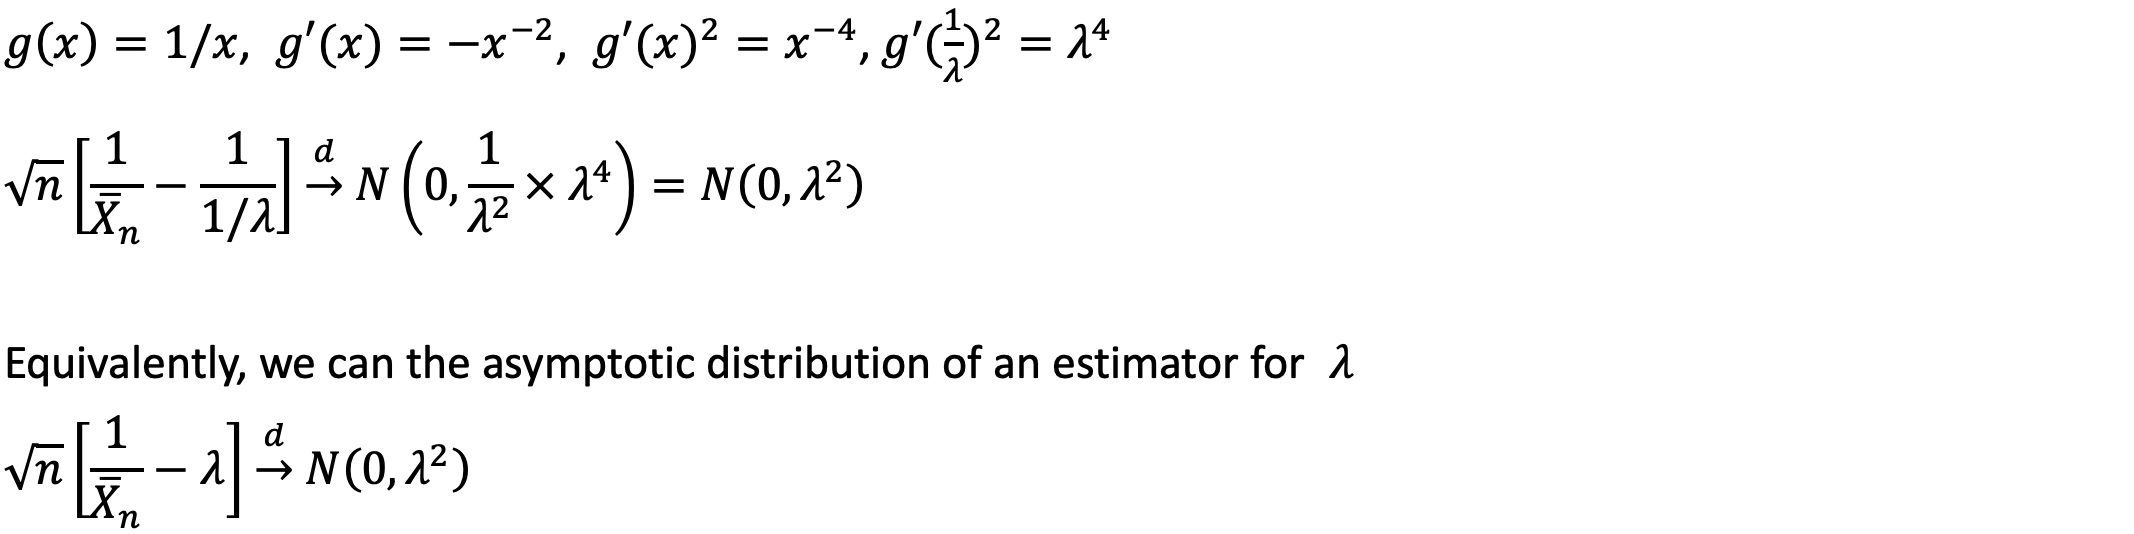

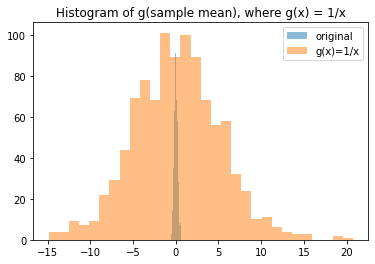

Theoretical Variance: 25
Sample Variance: 26.265


In [135]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_3,alpha=0.5,bins=30,label = 'g(x)=1/x')
plt.title('Histogram of g(sample mean), where g(x) = 1/x')
plt.legend()
plt.show()
print("Theoretical Variance: " + str(Lambda**2))
print("Sample Variance: " + str(round(np.var(series_3,ddof=1),3)))

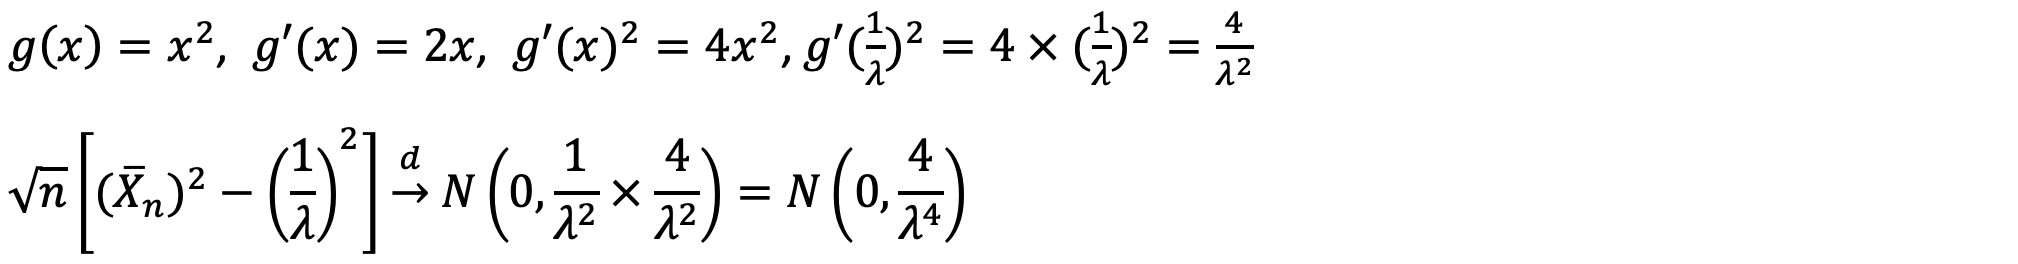

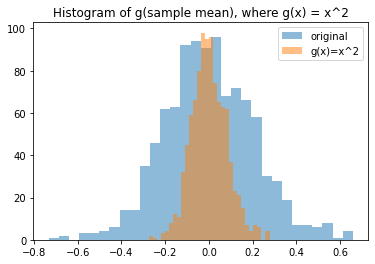

Theoretical Variance: 0.0064
Sample Variance: 0.007


In [137]:
plt.hist(series_1,alpha=0.5,bins=30,label = 'original')
plt.hist(series_4,alpha=0.5,bins=30,label = 'g(x)=x^2')
plt.title('Histogram of g(sample mean), where g(x) = x^2')
plt.legend()
plt.show()
print("Theoretical Variance: " + str(4/(Lambda**4)))
print("Sample Variance: " + str(round(np.var(series_4,ddof=1),3)))